# Environmental Analytics Lab 2
## Semester 2, 2022-23
## Dr. Bianca Schoen-Phelan


**Task**: Run the cells that contain examples (either by using the play button or by typeing `shift+Enter`). Do the exercises that are marked with "**Task**".

For today' lab we need some specific versions. Please run the below code first to make sure we are all using the right versions of the libraries.

Like pandas, geopandas is also available in colab.

In [5]:
# Import necessary modules
!pip install geopandas
import pandas as pd
# !pip install geopandas
import geopandas as gpd
from shapely.geometry import Point, LineString, MultiLineString, Polygon, MultiPolygon, MultiPoint

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached geopandas-0.12.2-py3-none-any.whl (1.1 MB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.7/42.7 kB 3.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 59.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 51.8 MB/s eta 0:00:00
  Using cached Fiona-1.9.3-cp39-cp39-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (16.1 MB)
  Using cached pyproj-3.5.0-cp39-cp39-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (7.8 MB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 96.6/96.6 kB 12.7 MB/s eta 0:00:00
  Using cached munch-2.5.0-py2.py3-none-any.whl (10 kB)
  Using cached click_plugins-1.1.1-py2.py3-none-any.whl (7.5 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.0/60.0 kB 8.2 MB/s eta 0:00:00
  Using cached cligj-0.7.2-py3-none-any.whl (7.1 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 502.3/502.3 kB 33.4 MB/s eta 0:00:00

Let's connect to our google drive.

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Reading a CSV file
Your `data_share` folder has a new file in it called `addresses.txt`. Please copy this to your own drive or if you have the `data_share` drive linked, use your path here!

In [7]:
# Filepath
fp_addresses = r"/content/drive/Othercomputers/Laptop/Documents/College/4th-Year/Environmental_Analytics/Week 3/addresses.txt"
# Read the data
data_addresses = pd.read_csv(fp_addresses, sep=';')

In [8]:
len(data_addresses)

3

In [9]:
data_addresses

,id,addr
0,1001,"2 Drogheda St, Monasterevin, Co. Kildare, Ireland"
1,1002,"Finnegans Way, Trim, Co. Meath, Ireland"
2,1003,"20 Hyde Ct, Roscommon, Ireland"


## Geocoding with Nominatim

Geocoding is the process of transforming a description of a location—such as a pair of coordinates, an address, or a name of a place—to a location on the Earth's surface. You can geocode by entering one location description at a time or by providing many of them at once in a table. The resulting locations are output as geographic features with attributes, which can be used for mapping or spatial analysis.

[from: ArcGIS documentation]

In [10]:
# Import the geocoding tool
from geopandas.tools import geocode

We are going to use [nominatim](https://nominatim.openstreetmap.org/ui/search.html) for geocoding. Nominatim has the advantage that you do not need to request a developer key. Defining your address in a way that it is recognisable by nominatim is **not trivial** and requires some trial and error. The address must be in [OpenStreetMap](https://www.openstreetmap.org/#map=17/53.32321/-8.21866).
However, they apply load balancing. You also must provide a custom application name, see below. Also check out the [nominatim api documentation](https://nominatim.org/release-docs/develop/api/Overview/).

You **must** change the entry in `user_agent` or we will exceed the service access for this class. you can choose a new name as you wish.

In [11]:
# Geocode addresses using Nominatim. Remember to provide a custom 
# "application name" in the user_agent parameter!
# check the nominatim api documentation to understand the values that are passed
# as parameters
!pip install geopy
geo = geocode(data_addresses['addr'], provider='nominatim', user_agent='D20125299_w3', timeout=4)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.8/119.8 kB 9.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.3/40.3 kB 5.3 MB/s eta 0:00:00


In [12]:
geo

,geometry,address
0,POINT (-7.06112 53.13905),"Drogheda Street, Cahill's Cross, Monasterevin ..."
1,POINT EMPTY,None
2,POINT (-8.18129 53.62210),"Hyde Court, Roscommon Rural ED, Roscommon Muni..."


Some will come up empty. In this case, we have two choices:
can't do anything else but to delete the offending rows.

1.   try to find the correct address in OpenStreetMap and get it to work, or
2.   delete the address.

Here we will delete the address



In [13]:
# deleting a row by looking for the word None as part of the string.
# notice how you have to cast the DataSeries first into a str object.

geo = geo[geo["address"].str.contains("None") == False]


In [14]:
geo

,geometry,address
0,POINT (-7.06112 53.13905),"Drogheda Street, Cahill's Cross, Monasterevin ..."
2,POINT (-8.18129 53.62210),"Hyde Court, Roscommon Rural ED, Roscommon Muni..."


You should see the 2 point geometries containing longitude and latititude information for the selected addresses.

We can also join the two DataFrames together using join. Notice how this is an inner join. This means that only information that is present in both will be displayed.

In [15]:
# remind ourselves what is in data_addresses
data_addresses

,id,addr
0,1001,"2 Drogheda St, Monasterevin, Co. Kildare, Ireland"
1,1002,"Finnegans Way, Trim, Co. Meath, Ireland"
2,1003,"20 Hyde Ct, Roscommon, Ireland"


In [16]:
# now let's join our address with the geocoded information
# see how the addresses are written by Norminatim
# spend some time here to really understand the format and 
# what it takes to find an address. This can be a very time
# consuming task!
join_data = geo.join(data_addresses)
join_data

,geometry,address,id,addr
0,POINT (-7.06112 53.13905),"Drogheda Street, Cahill's Cross, Monasterevin ...",1001,"2 Drogheda St, Monasterevin, Co. Kildare, Ireland"
2,POINT (-8.18129 53.62210),"Hyde Court, Roscommon Rural ED, Roscommon Muni...",1003,"20 Hyde Ct, Roscommon, Ireland"


Notice how the addresses are written differently. If the difference is not too big, nominatim will often be able to still find an address, even if it is not entered exact. This step to geo-code your addresses can end up being **very** timeconsuming, as you might end up researching individual addresses to conform with the format that your specific geo-coder requires.

In [17]:
type(join_data)
# If you would do the join the other way around, i.e. data_addresses.join(geo), 
# the output would be a pandas DataFrame, not a GeoDataFrame!

geopandas.geodataframe.GeoDataFrame

Remember to change the paths to suit your own system!

#### Saving our info as a Shapefile
Shapefiles are simple, very popular files for storing the geometric location and attribute information of geographic features. This file format does not store topological information. Geographic features in a shapefile can be represented by points, lines, or polygons (areas). A shapefile is never really just 1 file. Typically, there are many files that make up "the" shapefile.

In order to create these files, we need another library: GDAL! GDAL is a translator library for raster and vector geospatial data formats and you will encounter it a lot when dealing with files that contain geo-information!

Here, we get to use another bash command. apt is short for 'advanced package installer'.

GDAL and fiona are packages that are pre-installed on colab.

GDAL is a translator library for raster and vector geospatial data formats.

Fiona lets Python developers to interface geographic information systems with other computer systems by reading and writing geographic data files. Fiona includes extension modules that connect the Geospatial Data Abstraction Library to other applications (GDAL).

In [ ]:
!pip install -q condacolab
import condacolab
condacolab.install()
!mamba install -q gdal=3.3.2
from osgeo import gdal
!gdalinfo --version

⏬ Downloading https://github.com/jaimergp/miniforge/releases/latest/download/Mambaforge-colab-Linux-x86_64.sh...
📦 Installing...
📌 Adjusting configuration...
🩹 Patching environment...
⏲ Done in 0:00:14
🔁 Restarting kernel...
Preparing transaction: ...working... done
Verifying transaction: ...working... done
Executing transaction: ...working... done
GDAL 3.3.2, released 2021/09/01


In [18]:
import fiona

In [19]:
# Check supported format drivers
fiona.drvsupport.supported_drivers

{'DXF': 'rw',
 'CSV': 'raw',
 'OpenFileGDB': 'raw',
 'ESRIJSON': 'r',
 'ESRI Shapefile': 'raw',
 'FlatGeobuf': 'raw',
 'GeoJSON': 'raw',
 'GeoJSONSeq': 'raw',
 'GPKG': 'raw',
 'GML': 'rw',
 'OGR_GMT': 'rw',
 'GPX': 'rw',
 'MapInfo File': 'raw',
 'DGN': 'raw',
 'S57': 'r',
 'SQLite': 'raw',
 'TopoJSON': 'r'}

###Task 1
Change the path in the following command to save the file. We will work with this file later.

In [21]:
# Output file path
outfp = r"/content/drive/Othercomputers/Laptop/Documents/College/4th-Year/Environmental_Analytics/Week 3/addresses.shp"

# Save to Shapefile
# this is the piece of code where you start to need GDAL functionality!

# if you have any rows in your file that contains the None geometries this 
# next line will fail!
# there may be WARNING messages. These can be ignored for now.
join_data.to_file(outfp)

Check that the file is in your google drive at your destination!

## Point Location
Let's do some revision on Shapely geometries, and then see how we can combine this with our addresses from before in order to do some analysis.

In [22]:
from shapely.geometry import Point, Polygon, MultiPolygon, MultiPoint, LineString, MultiLineString, LinearRing

In [23]:
# Create Point objects
# do you recognise the coordinates?
p1 = Point(53.338311, -6.270298)
p2 = Point(53.363835, -6.220330)

In [24]:
# Create a Polygon
coords = [(53.336226, -6.273095), (53.337610, -6.267312), (53.340609, -6.270072), (53.336226, -6.273095)]
poly = Polygon(coords)

Shapely is a planar geometry library and z, the height above or below the plane, is ignored in geometric analysis. There is a potential pitfall for users here: coordinate tuples that differ only in z are not distinguished from each other and their application can result in suprisingly invalid geometry objects. For example, LineString([(0, 0, 0), (0, 0, 1)]) does not return a vertical line of unit length, but an invalid line in the plane with zero length. Similarly, Polygon([(0, 0, 0), (0, 0, 1), (1, 1, 1)]) is not bounded by a closed ring and is invalid.

For examples on what a "valid" geometry looks like, [please read this documentation (click).](https://shapely.readthedocs.io/en/stable/manual.html)

In [25]:
poly.is_valid

True

In [26]:
poly.is_simple

True

In [27]:
poly.is_closed # suprising?

False

###Task 2
Experiment with this. Consult the [shapely documentation](https://shapely.readthedocs.io/en/stable/manual.html#polygons). How can you make the `is_closed` check return `True`? 

**Hint**: what are we actually checking here vs what we should be checking? For example, you have learnt that Polygons are defined through an outer/exterior and and inner/interior. So was our question before valid? Probably not, as it wasn't precise enough. The difficulty is that Shapely won't refuse a non logical query. It will just assume that you know what you are asking and give you some result.

In [ ]:
# your code goes here

In [28]:
list(poly.exterior.coords)

[(53.336226, -6.273095),
 (53.33761, -6.267312),
 (53.340609, -6.270072),
 (53.336226, -6.273095)]

In [29]:
poly.exterior.is_closed

True

###Task 3
Before you move on, test behaviour as well for `LineString` and `LinearRing`. Using the following list of coordinates: 
`[(0, 0), (1, 1), (1, -1)]` and check for `is_ring`. To help you with the investigation, it can help to just print the shapes to screen.

In [ ]:
# your code goes here

In [30]:
l_s = LineString([(0, 0), (1, 1), (1, -1)])
l_s.is_ring

False

In [31]:
l_r = LinearRing([(0, 0), (1, 1), (1, -1)])
l_r.is_ring

True

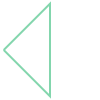

In [32]:
l_r

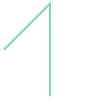

In [33]:
l_s

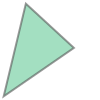

In [34]:
poly

In [35]:
# Let's check what we have
print(p1)
print(p2)
print(poly)

POINT (53.338311 -6.270298)
POINT (53.363835 -6.22033)
POLYGON ((53.336226 -6.273095, 53.33761 -6.267312, 53.340609 -6.270072, 53.336226 -6.273095))


In [36]:
# Check if p1 is within the polygon using the within function
p1.within(poly)

True

In [37]:
# Check if p2 is within the polygon
p2.within(poly)

False

In [38]:
# Our point is very close to the centre of mass of the polygon
print(p1)

# The centroid
print(poly.centroid)

POINT (53.338311 -6.270298)
POINT (53.33814833333333 -6.270159666666666)


In [39]:
# Does polygon contain p1?
poly.contains(p1)

True

In [40]:
# Does polygon contain p2?
poly.contains(p2)


False

### Intersections

In [41]:
from shapely.geometry import LineString, MultiLineString

In [42]:
# Create two lines
line_a = LineString([(0, 0), (1, 1)])
line_b = LineString([(1, 1), (0, 2)])

In [43]:
line_a.intersects(line_b)

True

In [44]:
line_a.touches(line_b)

True

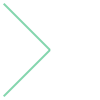

In [45]:
# Create a MultiLineString from line_a and line_b
multi_line = MultiLineString([line_a, line_b])
multi_line

In [46]:
# Does the line touch with itself?
line_a.touches(line_a)

False

In [47]:
# Does the line intersect with itself?
line_a.intersects(line_a)

True

## Point in Polygon with Geopandas
After having looked at some basics, let's move on to actual geometries and go back to our address information and let's learn some more about shapefiles.

We are now going to use the addresses.shp shapefile that you have created earlier.

In [49]:
# this is the file we created earlier.
# adjust the path to what it is on your system!
fp_addr_shape = "/content/drive/Othercomputers/Laptop/Documents/College/4th-Year/Environmental_Analytics/Week 3/addresses.shp"
data_shp = gpd.read_file(fp_addr_shape)

data_shp.head()

,address,id,addr,geometry
0,"Drogheda Street, Cahill's Cross, Monasterevin ...",1001,"2 Drogheda St, Monasterevin, Co. Kildare, Ireland",POINT (-7.06112 53.13905)
1,"Hyde Court, Roscommon Rural ED, Roscommon Muni...",1003,"20 Hyde Ct, Roscommon, Ireland",POINT (-8.18129 53.62210)


In [50]:
type(data_shp)

geopandas.geodataframe.GeoDataFrame

Our `data_shp `-variable is a `GeoDataFrame`. `GeoDataFrame` extends the functionalities of `pandas.DataFrame` in a way that it is possible to handle spatial data using similar approaches and data structures as in pandas.

You can see here how we have a `geometry` column in our shape file. The type of this `geometry` is `Point`. You have all the functionality of Shapely when using GeoPandas.

In [51]:
data_shp.columns

Index(['address', 'id', 'addr', 'geometry'], dtype='object')

In [52]:
data_shp.type

0    Point
1    Point
dtype: object

It is always a good idea to explore a visual of your data. Creating a simple map from a `GeoDataFrame` is really easy: you can use the `.plot()` -function from `GeoPandas` that creates a map based on the geometries of the data.

<Axes: >

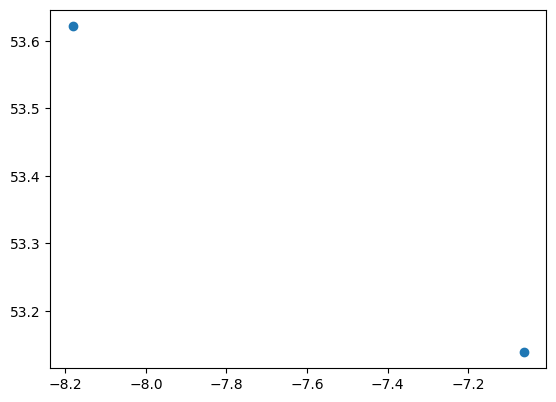

In [53]:
data_shp.plot()

In [54]:
# It is possible to get a specific column by specifying the column name 
# within square brackets []
print(data_shp['geometry'].head())

0    POINT (-7.06112 53.13905)
1    POINT (-8.18129 53.62210)
Name: geometry, dtype: geometry


In [55]:
data_shp.geometry.name # this returns a kind of unintuitive name. 
# Let's change that in the next step.

'geometry'

In [56]:
# change the name of the geometry column
data_shp = data_shp.rename(columns={'geometry': 'locations'}).set_geometry('locations')
data_shp.geometry.name

'locations'

The following counties of Ireland file is available in your `data_share` folder.

In [58]:
fp_counties = "/content/drive/Othercomputers/Laptop/Documents/College/4th-Year/Environmental_Analytics/Week 3/Counties___OSi_National_Statutory_Boundaries_.shp"

counties = gpd.read_file(fp_counties)

counties.head()

,OBJECTID,CO_ID,ENGLISH,GAEILGE,LOGAINM_ID,GUID,CONTAE,COUNTY,PROVINCE,CENTROID_X,CENTROID_Y,AREA,SHAPE_Leng,SHAPE_Area,geometry
0,1,50000,DONEGAL,Dún na nGall,100013,2ae19629-1452-13a3-e055-000000000001,Dún na nGall,DONEGAL,Ulster,607296.31,911848.45,4.860754e+09,1.859119e+06,4.860754e+09,"MULTIPOLYGON (((594809.032 934698.617, 594809...."
1,2,120000,LIMERICK,Luimneach,100022,2ae19629-1440-13a3-e055-000000000001,Luimneach,LIMERICK,Munster,548318.75,640943.05,2.754926e+09,3.897987e+05,2.754926e+09,"POLYGON ((565662.328 665775.167, 565663.255 66..."
2,3,80000,KILDARE,Cill Dara,100007,2ae19629-1455-13a3-e055-000000000001,Cill Dara,KILDARE,Leinster,678993.60,712090.40,1.694083e+09,2.970485e+05,1.694083e+09,"POLYGON ((700193.727 734740.683, 700202.676 73..."
3,4,220000,WATERFORD,Port Láirge,100026,2ae19629-144b-13a3-e055-000000000001,Port Láirge,WATERFORD,Munster,630336.80,599955.37,1.857038e+09,4.572206e+05,1.857038e+09,"MULTIPOLYGON (((627774.638 593971.494, 627777...."
4,5,260000,DUBLIN,Baile Átha Cliath,100002,2ae19629-144f-13a3-e055-000000000001,Baile Átha Cliath,DUBLIN,Leinster,714929.28,740960.44,9.257609e+08,3.661986e+05,9.257609e+08,"MULTIPOLYGON (((703019.336 739044.540, 703020...."


In [59]:
counties.shape

(26, 15)

In [60]:
counties.columns

Index(['OBJECTID', 'CO_ID', 'ENGLISH', 'GAEILGE', 'LOGAINM_ID', 'GUID',
       'CONTAE', 'COUNTY', 'PROVINCE', 'CENTROID_X', 'CENTROID_Y', 'AREA',
       'SHAPE_Leng', 'SHAPE_Area', 'geometry'],
      dtype='object')

In [61]:
len(counties)

26

As you can see the file contains only the 26 counties of the Republic of Ireland (not the 6 of Northern Ireland).

In [62]:
type(counties)

geopandas.geodataframe.GeoDataFrame

In [63]:
counties.is_valid

0     True
1     True
2     True
3     True
4     True
5     True
6     True
7     True
8     True
9     True
10    True
11    True
12    True
13    True
14    True
15    True
16    True
17    True
18    True
19    True
20    True
21    True
22    True
23    True
24    True
25    True
dtype: bool

In [64]:
counties.type

0     MultiPolygon
1          Polygon
2          Polygon
3     MultiPolygon
4     MultiPolygon
5          Polygon
6          Polygon
7     MultiPolygon
8     MultiPolygon
9     MultiPolygon
10         Polygon
11    MultiPolygon
12         Polygon
13         Polygon
14         Polygon
15         Polygon
16    MultiPolygon
17    MultiPolygon
18    MultiPolygon
19    MultiPolygon
20         Polygon
21         Polygon
22         Polygon
23    MultiPolygon
24         Polygon
25    MultiPolygon
dtype: object

In [65]:
# does the same as above, just uses a different library
counties.geom_type

0     MultiPolygon
1          Polygon
2          Polygon
3     MultiPolygon
4     MultiPolygon
5          Polygon
6          Polygon
7     MultiPolygon
8     MultiPolygon
9     MultiPolygon
10         Polygon
11    MultiPolygon
12         Polygon
13         Polygon
14         Polygon
15         Polygon
16    MultiPolygon
17    MultiPolygon
18    MultiPolygon
19    MultiPolygon
20         Polygon
21         Polygon
22         Polygon
23    MultiPolygon
24         Polygon
25    MultiPolygon
dtype: object

<Axes: >

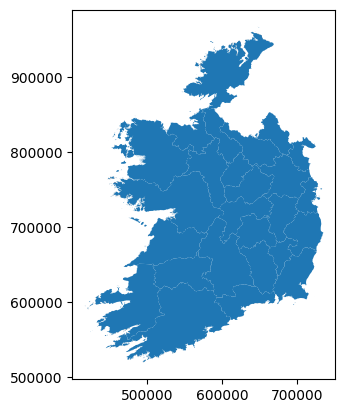

In [66]:
counties.plot()

Let's bring our different pieces of information together and learn how to overlay information on top of each other. For this, we need the matplotlib library.

matplotlib is a comprehensive library for creating static, animated, and interactive visualizations in Python. matplotlib is widely used but not the only plotting library there is.

In [67]:
import matplotlib.pyplot as plt

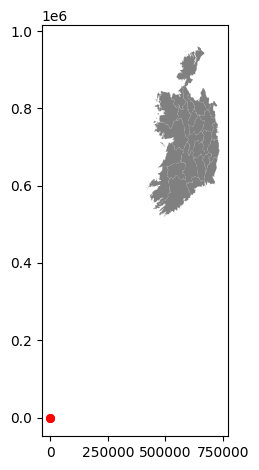

In [68]:
# Create a figure with one subplot
fig, ax = plt.subplots()
# Plot polygons
# counties.plot(ax=ax, facecolor='gray')
counties.plot(ax=ax, facecolor='gray')
# Plot points
data_shp.plot(ax=ax, color='red', markersize=30)
plt.tight_layout()

This is probably not the result that you have expected. Let's examine what a reason could be for the strangely 'separated' output.

In [69]:
# always check coordinate systems before doing anything. 
# We will try transformations next week!
print(counties.crs)
print(data_shp.crs)

EPSG:2157
EPSG:4326


**Map projections** try to portray the surface of the Earth on a flat piece of paper or computer screen. In layman’s term, map projections try to transform the Earth from its spherical shape (3D) to a planar shape (2D). This is similar to trying to flatten a whole orange peel on a table. You know that cracks appear when you try to do this. How we fill those cracks, is the strategy behind every coordinate reference system.

A **coordinate reference system (CRS)** then defines how the two-dimensional, projected map relates to real places on the Earth. 


There are many many different CRS. The decision of which map projection and CRS to use depends on the regional extent of the area you want to work in, on the analysis you want to do, and often on the availability of data. This is something we will discuss deeper in the lecture later.

You see in our example that the two data files are in different coordinate reference systems.

Check out this spatial reference identifier (SRID) in the [epsg website](https://epsg.org/home.html).

You see that 
2157 - Irish Transverse Mercator, and
4326 - WGS 84.

Both you will get to know more in today's lecture. For now, the first is a local coordinate reference system for Ireland. The second is a global coordinate reference system. 

In order to display the data together, we need both data sets to be in the same coordinate reference system. This is the case not just for displaying data, but also for any analysis you wish you do.


In [70]:
# The .to_crs()-function has two alternative parameters 1) crs, and 2) epgs 
# that can be used to make the coordinate transformation and 
# re-project the data into the CRS that you want to.
# Let's make a backup copy of our data

# let's make a copy first, maybe you'd like to preserve the original
data_wgs84 = data_shp.copy()

# Reproject the data
data_2157 = data_shp.to_crs(epsg=2157)

In [71]:
data_2157

,address,id,addr,locations
0,"Drogheda Street, Cahill's Cross, Monasterevin ...",1001,"2 Drogheda St, Monasterevin, Co. Kildare, Ireland",POINT (662819.157 710247.815)
1,"Hyde Court, Roscommon Rural ED, Roscommon Muni...",1003,"20 Hyde Ct, Roscommon, Ireland",POINT (588006.815 763602.125)


In [72]:
# compare the values in the geometry column
data_wgs84

,address,id,addr,locations
0,"Drogheda Street, Cahill's Cross, Monasterevin ...",1001,"2 Drogheda St, Monasterevin, Co. Kildare, Ireland",POINT (-7.06112 53.13905)
1,"Hyde Court, Roscommon Rural ED, Roscommon Muni...",1003,"20 Hyde Ct, Roscommon, Ireland",POINT (-8.18129 53.62210)


### Task 4
Compare the values in the geometry column. Observe the different number values for longitude and latitude values.
We still describe the same positions on the Earth. We just used a different system to refer to it.

###Task 5
Redo the drawing from earlier and this time use datasets with the same CRS.

In [75]:
# your code goes here

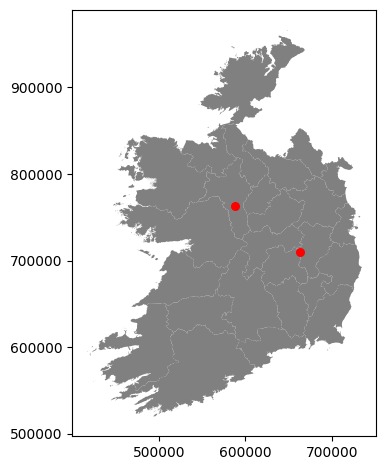

In [76]:
# Create a figure with one subplot
fig, ax = plt.subplots()
# Plot polygons
# counties.plot(ax=ax, facecolor='gray')
counties.plot(ax=ax, facecolor='gray')
# Plot points
data_2157.plot(ax=ax, color='red', markersize=30)
plt.tight_layout()

###Task 6
Transform your counties shapefile into the 3035 SRID and call it `counties_3035`.
Look up on the epsg website what 3035 is.

In [77]:
# Your code goes here and compare the coordinates in the geometry

In [78]:
counties_2157 = counties.copy()

counties_3035 = counties.to_crs(epsg=3035)

In [79]:
counties_3035.head()

,OBJECTID,CO_ID,ENGLISH,GAEILGE,LOGAINM_ID,GUID,CONTAE,COUNTY,PROVINCE,CENTROID_X,CENTROID_Y,AREA,SHAPE_Leng,SHAPE_Area,geometry
0,1,50000,DONEGAL,Dún na nGall,100013,2ae19629-1452-13a3-e055-000000000001,Dún na nGall,DONEGAL,Ulster,607296.31,911848.45,4.860754e+09,1.859119e+06,4.860754e+09,"MULTIPOLYGON (((3182036.521 3705585.448, 31820..."
1,2,120000,LIMERICK,Luimneach,100022,2ae19629-1440-13a3-e055-000000000001,Luimneach,LIMERICK,Munster,548318.75,640943.05,2.754926e+09,3.897987e+05,2.754926e+09,"POLYGON ((3086579.463 3451053.366, 3086584.098..."
2,3,80000,KILDARE,Cill Dara,100007,2ae19629-1455-13a3-e055-000000000001,Cill Dara,KILDARE,Leinster,678993.60,712090.40,1.694083e+09,2.970485e+05,1.694083e+09,"POLYGON ((3233497.803 3485073.587, 3233505.206..."
3,4,220000,WATERFORD,Port Láirge,100026,2ae19629-144b-13a3-e055-000000000001,Port Láirge,WATERFORD,Munster,630336.80,599955.37,1.857038e+09,4.572206e+05,1.857038e+09,"MULTIPOLYGON (((3128791.890 3365858.810, 31287..."
4,5,260000,DUBLIN,Baile Átha Cliath,100002,2ae19629-144f-13a3-e055-000000000001,Baile Átha Cliath,DUBLIN,Leinster,714929.28,740960.44,9.257609e+08,3.661986e+05,9.257609e+08,"MULTIPOLYGON (((3237295.918 3488563.063, 32372..."


Lets also do a visual and compare the two different projections.

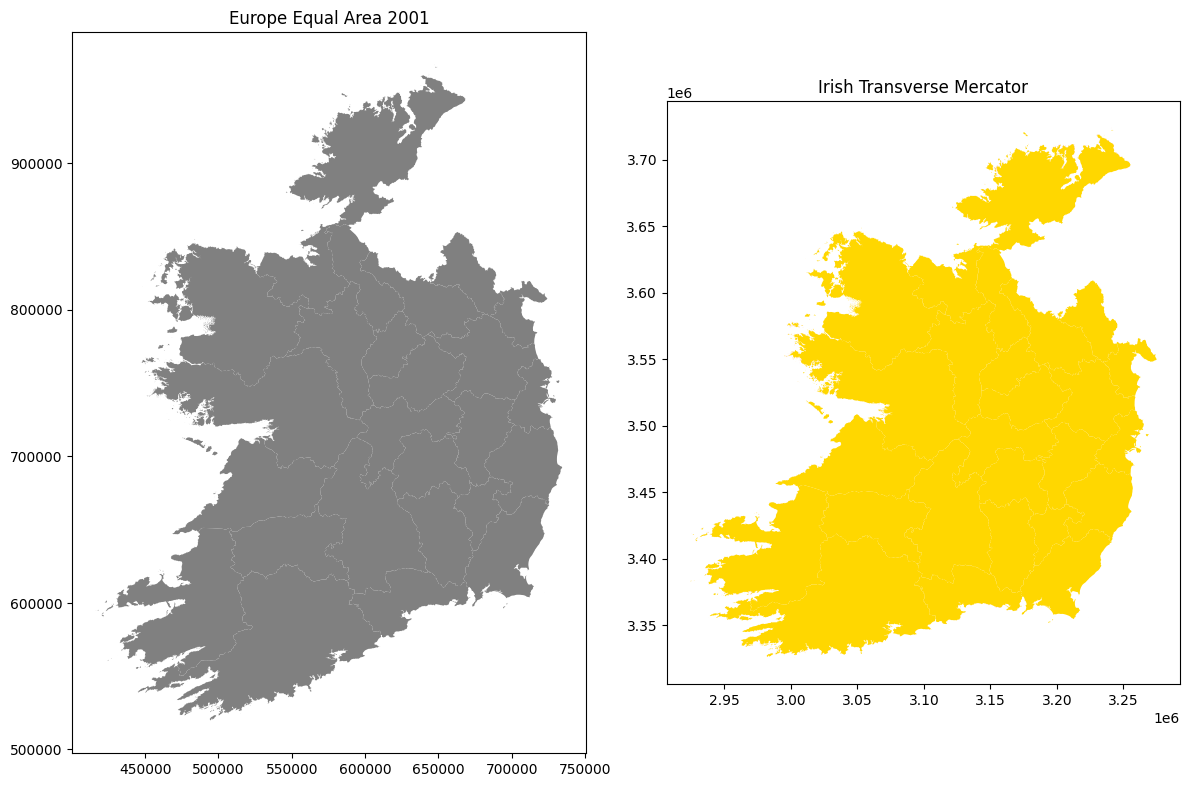

In [80]:
import matplotlib.pyplot as plt

# Make subplots that are next to each other
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12, 8))

# Plot the data in WGS84 CRS
counties_2157.plot(ax=ax1, facecolor='gray');

# Add title
ax1.set_title("Europe Equal Area 2001");

# Plot the one with ETRS-LAEA projection
counties_3035.plot(ax=ax2, facecolor='gold');

# Add title
ax2.set_title("Irish Transverse Mercator");

# Remove empty white space around the plot
plt.tight_layout()

Indeed, the maps look quite different. Which one are you more used to?

###Task 7
Save your projected counties into a shapefile so we can use it later if we need it.

In [ ]:
# Your code goes here

In [81]:
# Output file path
outfp = r"/content/drive/Othercomputers/Laptop/Documents/College/4th-Year/Environmental_Analytics/Week 3/counties_3035.shp"

# Save to Shapefile
counties_3035.to_file(outfp)

## Global Map Projections
For this go back to our data_share folder and look at the file called `ne_110m_land.shp `.
This Shapefile was downloaded from https://www.naturalearthdata.com/.

###Task 8
Read the data file and plot different projections.

In [ ]:
# Your Code goes here

In [82]:
# Read in data
fp_world = "/content/drive/Othercomputers/Laptop/Documents/College/4th-Year/Environmental_Analytics/Week 3/ne_110m_land.shp"
world_shp = gpd.read_file(fp_world)
world_shp

,featurecla,scalerank,min_zoom,geometry
0,Land,1,1.0,"POLYGON ((-59.57209 -80.04018, -59.86585 -80.5..."
1,Land,1,1.0,"POLYGON ((-159.20818 -79.49706, -161.12760 -79..."
2,Land,1,0.0,"POLYGON ((-45.15476 -78.04707, -43.92083 -78.4..."
3,Land,1,1.0,"POLYGON ((-121.21151 -73.50099, -119.91885 -73..."
4,Land,1,1.0,"POLYGON ((-125.55957 -73.48135, -124.03188 -73..."
...,...,...,...,...
122,Land,1,1.0,"POLYGON ((51.13619 80.54728, 49.79368 80.41543..."
123,Land,0,0.0,"POLYGON ((99.93976 78.88094, 97.75794 78.75620..."
124,Land,0,0.0,"POLYGON ((-87.02000 79.66000, -85.81435 79.336..."
125,Land,0,0.0,"POLYGON ((-68.50000 83.10632, -65.82735 83.028..."


In [83]:
# Check input crs
world_shp.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

Text(0.5, 1.0, 'WGS84')

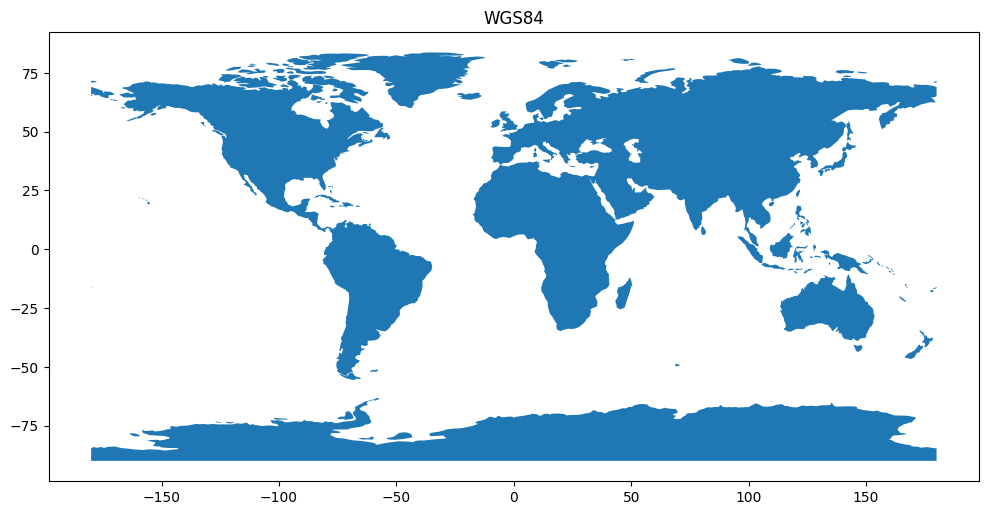

In [84]:
# Set fig size
plt.rcParams['figure.figsize'] = [12, 6]
#Plot in original crs
world_shp.plot()
plt.title("WGS84")

Text(0.5, 1.0, 'Web mercator')

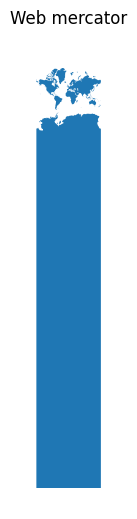

In [85]:
# Define projection as web mercator, 3785
# Re-project and plot
world_shp.to_crs(epsg=3785).plot()

# Remove x and y axis
plt.axis('off')
plt.title("Web mercator")

Define coordinate references esier with the CRS library:

In [86]:
from pyproj import CRS

Text(0.5, 1.0, 'Eckert IV')

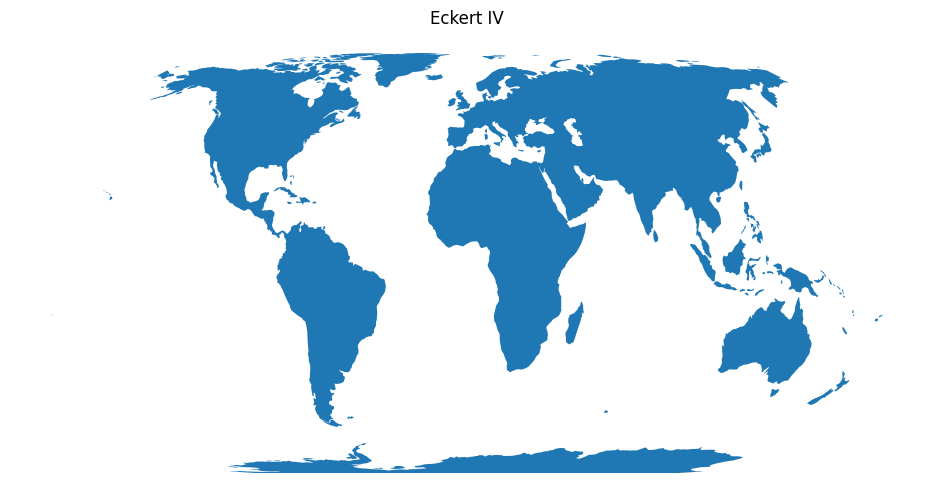

In [87]:
eckert_IV = CRS.from_proj4("+proj=eck4 +lon_0=0 +x_0=0 +y_0=0 +ellps=WGS84 +datum=WGS84 +units=m +no_defs")

# Re-project and plot to eckert_iv
world_shp.to_crs(eckert_IV).plot()

# Remove x and y axis
plt.axis('off')
plt.title("Eckert IV")

Text(0.5, 1.0, 'Orthographic')

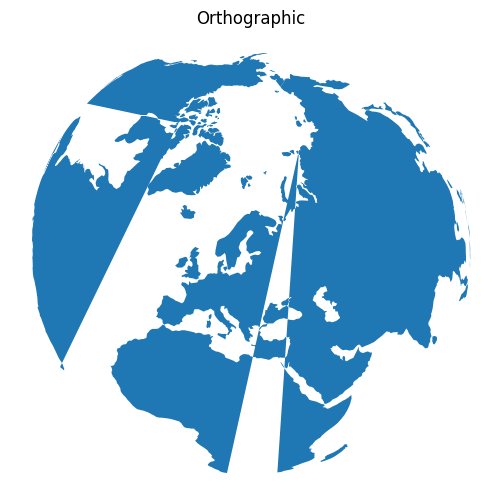

In [88]:
# Define an orthographic projection, centered in Finland! from: http://www.statsmapsnpix.com/2019/09/globe-projections-and-insets-in-qgis.html
ortho = CRS.from_proj4("+proj=ortho +lat_0=60.00 +lon_0=23.0000 +x_0=0 +y_0=0 +a=6370997 +b=6370997 +units=m +no_defs")

# Re-project and plot
world_shp.to_crs(ortho).plot()

# Remove x and y axis
plt.axis('off')
plt.title("Orthographic")

Which one is your favourite?
Try finding some more!